In [1]:
import pandas as pd
import numpy as np

# matplotlib 한글대응
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from matplotlib import font_manager, rc

get_ipython().run_line_magic("matplotlib", "inline")

path = "C:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    rc("font", family="Arial Unicode MS")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc("font", family=font_name)
else:
    print("Unknown system sorry.")

In [2]:
big5_raw = pd.read_csv('./IPIP-FFM-data-8Nov2018/data-final.csv', delimiter='\t')
big5_raw.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


In [3]:
big5_raw.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015341 entries, 0 to 1015340
Data columns (total 110 columns):
 #    Column                 Dtype  
---   ------                 -----  
 0    EXT1                   float64
 1    EXT2                   float64
 2    EXT3                   float64
 3    EXT4                   float64
 4    EXT5                   float64
 5    EXT6                   float64
 6    EXT7                   float64
 7    EXT8                   float64
 8    EXT9                   float64
 9    EXT10                  float64
 10   EST1                   float64
 11   EST2                   float64
 12   EST3                   float64
 13   EST4                   float64
 14   EST5                   float64
 15   EST6                   float64
 16   EST7                   float64
 17   EST8                   float64
 18   EST9                   float64
 19   EST10                  float64
 20   AGR1                   float64
 21   AGR2                   float6

In [4]:
big5_raw = big5_raw[big5_raw['IPC'] == 1]
# 결측치 제거
big5_raw.dropna(inplace=True)

In [5]:
# 필요없는 칼럼 제거
big5_raw.drop(['dateload', 'screenw', 'screenh', 'introelapse', 'testelapse', 'endelapse', 'IPC', 'lat_appx_lots_of_err','long_appx_lots_of_err'], axis=1, inplace=True)

In [6]:
# 일단 나라별로 문항 답변 데이터 집계

def ag(x):
    lis = list(x.columns)
    lis.remove('Count')
    lis.remove('country')
    dic = dict()
    for i in lis:
        dic[i] = 'mean'
    dic['Count'] = 'sum'
    return dic
    
big5_raw['Count'] = 1
big5_country = big5_raw.groupby(['country']).agg(ag(big5_raw))
big5_country.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,Count
country,,,,,,,,,,,,,,,,,,,,,
AD,2.666667,2.933333,2.866667,3.266667,3.400000,2.733333,3.066667,3.200000,2.866667,3.533333,...,7022.000000,4467.866667,7435.266667,4351.466667,4839.200000,5020.800000,3930.733333,5394.400000,3681.866667,15
AE,2.722010,2.896651,3.241627,3.139713,3.260766,2.615311,2.778469,3.236842,3.163158,3.502392,...,8848.950239,7826.140670,10244.434450,4158.619139,10281.193301,7831.704785,5712.321053,6030.011005,15184.092344,2090
AF,2.978261,2.847826,3.282609,3.260870,3.630435,2.543478,3.043478,3.369565,3.195652,3.391304,...,13827.652174,5621.347826,11671.521739,3797.130435,3786.739130,5406.304348,3295.282609,6474.021739,3929.608696,46
AG,2.318182,3.000000,3.045455,3.409091,3.590909,2.363636,2.272727,3.590909,2.227273,3.636364,...,7889.863636,4340.090909,5219.909091,3357.227273,3385.500000,4432.227273,14682.727273,4271.909091,3565.363636,22
AI,2.500000,3.000000,3.750000,3.500000,3.250000,2.500000,3.000000,4.000000,2.250000,4.000000,...,3339.500000,1883.250000,3780.750000,2875.000000,3700.750000,3813.250000,4399.750000,3697.750000,1842.500000,4


In [7]:
big5_country = big5_country.iloc[:,:50]

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
big5_country_scaled = pd.DataFrame(scaler.fit_transform(big5_country), columns=big5_country.columns)
big5_country_scaled.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,0.373712,0.028064,-0.758217,0.044919,0.533867,0.510401,1.045447,-0.419577,-0.202862,-0.160805,...,-0.209012,0.607197,-0.452418,0.078521,-0.056157,-0.345779,-0.980833,-0.123091,0.517455,0.138360
1,0.493422,-0.060291,0.184768,-0.255045,0.200540,0.229826,0.391425,-0.335444,0.419401,-0.239640,...,-0.455060,0.527615,-0.029355,0.571331,-0.114545,0.090445,-0.203462,-0.536888,-0.408021,-0.181966
2,1.047708,-0.177891,0.287833,0.031222,1.085528,0.059058,0.992824,-0.032355,0.487598,-0.522682,...,-0.564499,1.370310,-0.085318,1.341587,-0.639784,1.384480,-0.354229,-0.569111,-0.284650,-0.147011
3,-0.380081,0.188640,-0.308585,0.381437,0.990904,-0.368480,-0.756280,0.473109,-1.544794,0.101708,...,0.358235,0.247979,0.762905,-1.001869,-0.278032,-1.026883,-0.575528,0.204241,0.775474,0.257697
4,0.013202,0.188640,1.463271,0.596235,0.174767,-0.044303,0.894157,1.407316,-1.497095,1.028222,...,1.727453,-0.127948,0.602994,-0.581717,-0.208696,-1.756638,-0.928991,2.288667,0.872232,1.451066


C:\Users\sanghui\miniconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


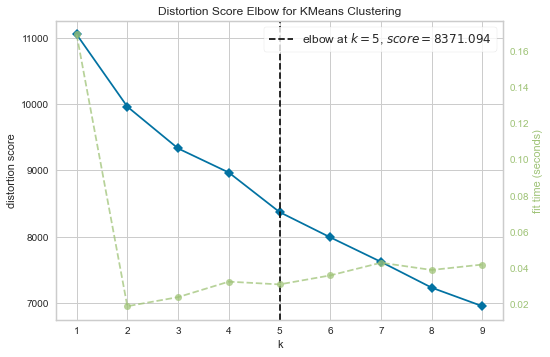

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
# elbow 점수
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

km = KMeans()
visualizer = KElbowVisualizer(km, k=(1,10))
visualizer.fit(big5_country_scaled)
visualizer.show()

In [22]:
# 실루엣 점수
from sklearn.metrics import silhouette_score

result = []

for i in range(2,8):
    km =  KMeans(n_clusters=i, max_iter=50, init='k-means++').fit(big5_country_scaled)
    result.append(silhouette_score(big5_country_scaled, km.labels_))
    

In [23]:
for i, item in enumerate(result):
    print(f'Cluster: {i+2}, Silhouette Score: {item}')

Cluster: 2, Silhouette Score: 0.2794795310581284
Cluster: 3, Silhouette Score: 0.21915001194412215
Cluster: 4, Silhouette Score: 0.22733312686242058
Cluster: 5, Silhouette Score: 0.11570826373470189
Cluster: 6, Silhouette Score: 0.07953756945800382
Cluster: 7, Silhouette Score: 0.11891806190182588


- Best Cluster number
    - elbow: 5
    - silhouette: 4

- 두가지 모델 각각 비교

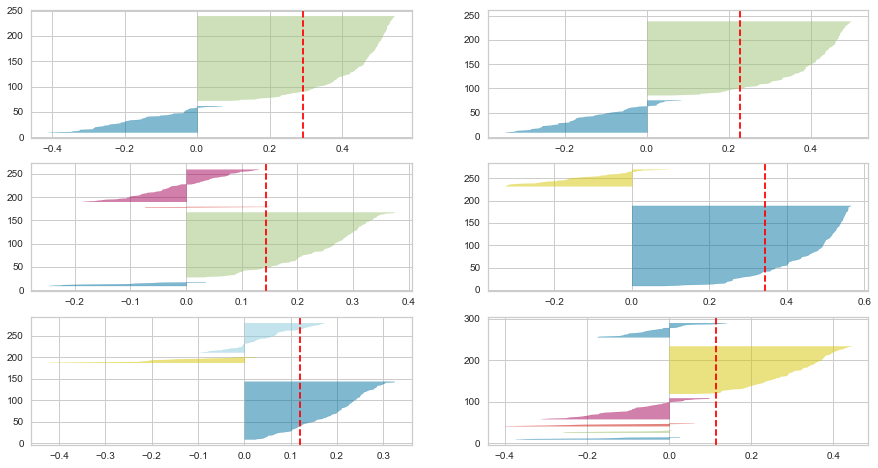

In [27]:
from yellowbrick.cluster import SilhouetteVisualizer


fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7]:
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(big5_country_scaled) 